# Exploratory Data Analysis

The main objectives for this notebook are:
- Identify correlations among the numerical features
- Observe the relationship of the features with the target variable
 



In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
app_train_clean_df = pd.read_csv('../data/Data 1.1 - application_train_cleaned.csv')
app_train_clean_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
0,100002,True,Cash loans,M,False,True,0,202500.0,406597.5,24700.5,...,False,False,False,0.0,0.0,0.0,0.0,0.0,1.0,25
1,100003,False,Cash loans,F,False,False,0,270000.0,1293502.5,35698.5,...,False,False,False,0.0,0.0,0.0,0.0,0.0,0.0,45
2,100004,False,Revolving loans,M,True,True,0,67500.0,135000.0,6750.0,...,False,False,False,0.0,0.0,0.0,0.0,0.0,0.0,52
3,100006,False,Cash loans,F,False,True,0,135000.0,312682.5,29686.5,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,52
4,100007,False,Cash loans,M,False,True,0,121500.0,513000.0,21865.5,...,False,False,False,0.0,0.0,0.0,0.0,0.0,0.0,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,False,Cash loans,M,False,False,0,157500.0,254700.0,27558.0,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,25
307507,456252,False,Cash loans,F,False,True,0,72000.0,269550.0,12001.5,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,56
307508,456253,False,Cash loans,F,False,True,0,153000.0,677664.0,29979.0,...,False,False,False,1.0,0.0,0.0,1.0,0.0,1.0,41
307509,456254,True,Cash loans,F,False,True,0,171000.0,370107.0,20205.0,...,False,False,False,0.0,0.0,0.0,0.0,0.0,0.0,32


In [3]:
def is_boolean_column(df: pd.DataFrame, col: str) -> bool:
    """
    Args:
        df: pd.DataFrame to check for column
        col: column to check
    Ret:
        bool: identifies int columns that can be turned into bool columns
    """
    # Check which columns have values of only 0 or 1
    if df[col].dropna().isin([0, 1]).all():
        return True
    return False

# Iteratively check columns containing only 0, 1 or NaN
bool_cols = [col for col in app_train_clean_df.columns if is_boolean_column(app_train_clean_df, col)]

In [4]:
app_train_df_withbool = app_train_clean_df.copy()

# Change datatype of identified columns
app_train_df_withbool[bool_cols] = app_train_df_withbool[bool_cols].astype(bool)

app_train_df_withbool.dtypes.value_counts()

float64    65
bool       36
object     13
int64       9
Name: count, dtype: int64

In [5]:
# Defining groupings
demographic_cols = ['CODE_GENDER', 'CNT_CHILDREN', 'NAME_FAMILY_STATUS', 'AGE']
transaction_cols = ['NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
transaction_misc_cols = ['NAME_TYPE_SUITE', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START']
socioeconomic_cols = ['AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'DAYS_EMPLOYED', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']
socioeconomic_misc_cols = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'OWN_CAR_AGE', 'DAYS_LAST_PHONE_CHANGE']

household_cols = ['NAME_HOUSING_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
                  'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 
                  'LIVE_CITY_NOT_WORK_CITY']

residence_specs_cols = list(app_train_df_withbool.columns[44:90])
social_circle_cols = list(app_train_df_withbool.columns[91:95])
documents_cols = list(app_train_df_withbool.columns[96:116])
bureau_cols = list(app_train_df_withbool.columns[116:122])

# Univariate analysis

In [6]:
sns.set_style("whitegrid")

## Target Variable

TARGET
False    0.919271
True     0.080729
Name: count, dtype: float64

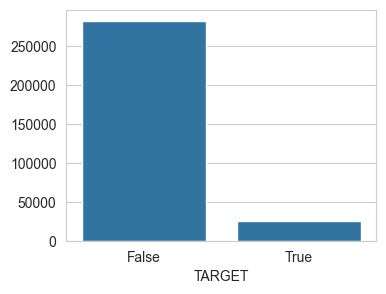

In [7]:
fig, ax = plt.subplots(figsize=(4,3))
sns.countplot(x='TARGET', data=app_train_df_withbool)
plt.ylabel('')

app_train_clean_df['TARGET'].value_counts()/len(app_train_df_withbool)

**Observations**
- 8.07% of the applicants have defaulted their loan application.

In [8]:
# def draw_mean_median(df, col, axes, i):
#     """
#     Function for drawing a mean and median line.
#     Arg: df['column']
#     """
#     print(str(i), '| mean: ', df[col].mean(), ' | median:', df[col].median())
#     axes[i].axvline(x=df[col].mean(),
#             color='red',
#             label='mean')
#     axes[i].axvline(x=df[col].median(),
#             color='green',
#             ls='--',
#             label='median')

# def trim_axs(axs, N):
#     """
#     Reduce *axs* to *N* Axes. All further Axes are removed from the figure.
#     """
#     axs = axs.flat
#     for ax in axs[N:]:
#         ax.remove()
#     return axs[:N]

# def multi_dtype_plot(df: pd.DataFrame, col_list:list, nrows:int, ncols:int, xtick_rotation=0, align='right', wspace=0.2, hspace=0.2):
#     """
#     Plots different types of columns in a grid of subplots.
#     Parameters:
#     df (pd.DataFrame): The dataframe containing the data.
#     col_list (list): List of column names to plot.
#     nrows (int): Number of rows in the subplot grid.
#     ncols (int): Number of columns in the subplot grid.
#     xtick_rotation (int, optional): Degrees to rotate the x-tick labels. Default is 0.
#     """    
#     fig, axes = plt.subplots(nrows, ncols, figsize=(14, 10))

#     # Flatten axes array for easy indexing and trim to the number of plots
#     axes = trim_axs(axes, len(col_list))  # Trim axes to the number of columns



#     for i, col in enumerate(col_list):
#         if df[col].dtypes == 'object':
#             sns.countplot(x=df[col], data=df, ax=axes[i])
#             axes[i].set_ylabel('')
#             axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=xtick_rotation,
#                                     horizontalalignment=align)
#         elif df[col].dtypes == 'int64' or df[col].dtypes == 'float64':
#             sns.histplot(x=df[col], ax=axes[i], bins=20)
#             draw_mean_median(df, col, axes, i)  # Fixed call to draw_mean_median
#             axes[i].set_ylabel('')

#     fig.subplots_adjust(wspace=wspace, hspace=hspace)
#     return fig, axes


In [33]:
from plot_functions import multi_dtype_plot

## Demographic information

In [32]:
multi_dtype_plot(app_train_df_withbool, demographic_cols, 2, 2, 45)

UnboundLocalError: cannot access local variable 'figsize' where it is not associated with a value

In [34]:
from scipy.stats import kstest

def percent_summary(df, column, items):
    """
    Prints percentage summary of aggregated data.

    Args:
        df (pd.DataFrame): The dataframe containing the data.
        column (str): The name of the column of interest.
        items: Number of value counts to show in the summary.
    """
    counts_series = df[column].value_counts(normalize=True)
    print(column)
    for i in range(items):
        print(f'{counts_series.index[i]}: {counts_series.iat[i]*100:.2f}%')
    print()

def ksresults(df, column, ddof=1, alpha=0.05):
    """
    Displays the comparison of the data distribution to a normal distribution.
    
    Args:
        df (pd.DataFrame): The dataframe containing the data.
        column (str): The name of the column of interest.
        ddof (int): Degrees of freedom. Set to 1 by default for sample population; set to 0 for population data.
        alpha (float): Confidence level, set to 0.05 by default.
    """
    
    statistic, p_val = kstest(df[column], 'norm', args=(np.mean(df[column]), np.std(df[column], ddof=ddof)))
    print(f'KS Statistic: {statistic:.4f}')
    print(f'p-value: {p_val}')
    if p_val <= alpha:
        print('Reject null hypothesis. Data does not come from a normal distribution.')
    else:
        print('Fail to reject null hypothesis. Data does not show sufficient evidence of deviating from a normal distribution.')

In [35]:
percent_summary(app_train_df_withbool, 'CODE_GENDER', items=2)
percent_summary(app_train_df_withbool, 'CNT_CHILDREN', items=2)
percent_summary(app_train_df_withbool, 'NAME_FAMILY_STATUS', items=2)
ksresults(app_train_df_withbool, 'AGE')

CODE_GENDER
F: 65.83%
M: 34.16%

CNT_CHILDREN
0: 70.04%
1: 19.88%

NAME_FAMILY_STATUS
Married: 63.88%
Single / not married: 14.78%

KS Statistic: 0.0614
p-value: 0.0
Reject null hypothesis. Data does not come from a normal distribution.


### Insights
- 2 out of 3 of the applicants are female, and 1 of out 3 are male.
- 70% of the applicants do not have a child, and 20% have one child.
- Almost 2 out of 3 applicants are single.
- Since the p-value is less than .05, we reject the null hypothesis of the Kolmogorov-Smirnov test. Therefore, the ages do not come from a normal distribution.

## Transaction details

c:\Users\Marco\Documents\GitHub\Credit-Risk\notebooks\plot_functions.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=xtick_rotation, horizontalalignment=align)


1 | mean:  599025.9997057016  | median: 513531.0
2 | mean:  27108.573909183444  | median: 24903.0
3 | mean:  538396.2074288895  | median: 450000.0


(<Figure size 1400x1000 with 4 Axes>,
 array([<Axes: xlabel='NAME_CONTRACT_TYPE'>, <Axes: xlabel='AMT_CREDIT'>,
        <Axes: xlabel='AMT_ANNUITY'>, <Axes: xlabel='AMT_GOODS_PRICE'>],
       dtype=object))

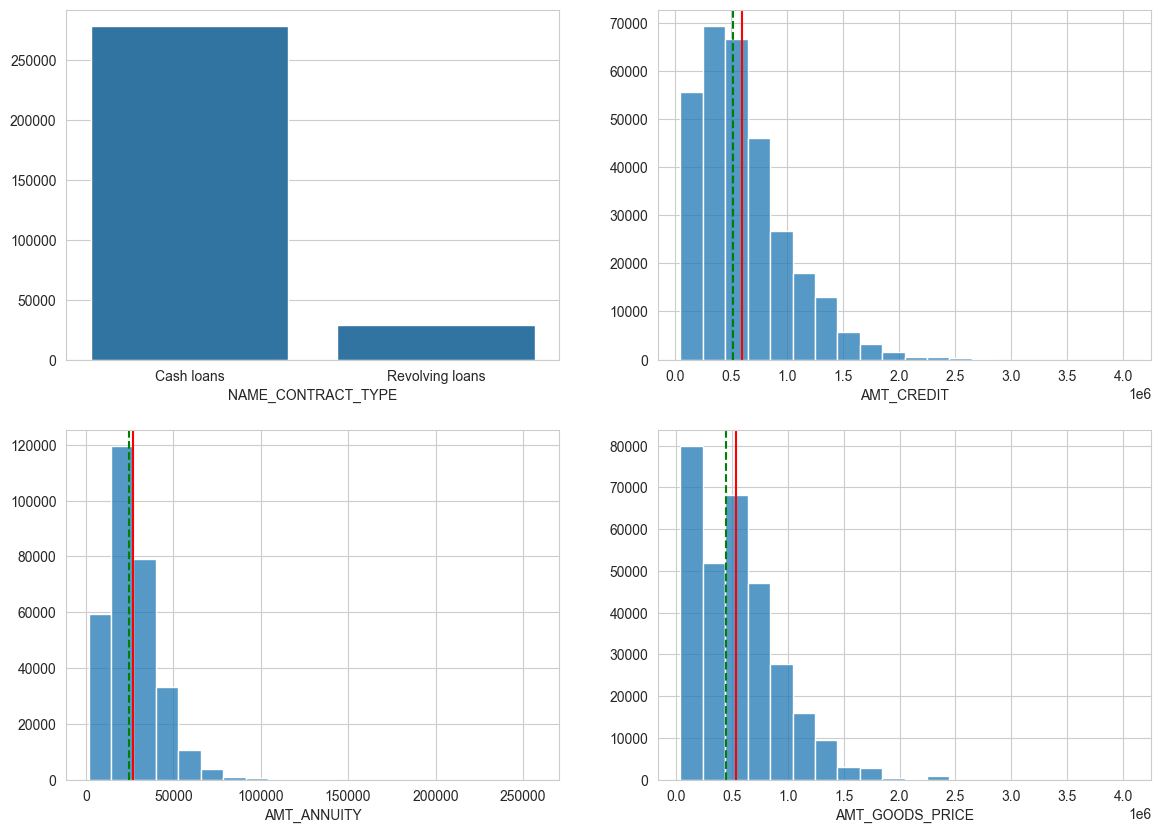

In [ ]:
multi_dtype_plot(app_train_df_withbool, transaction_cols, 2, 2, align='center')

In [ ]:
percent_summary(app_train_df_withbool, 'NAME_CONTRACT_TYPE', items=2)

NAME_CONTRACT_TYPE
Cash loans: 90.48%
Revolving loans: 9.52%



### Insights
- Nine out of ten contracts are cash loans, with one out of ten being a revolving loan.
- The amount distributions for credit, annuity, and goods price are all positively skewed. Outliers are not present, supported by the close values between the mean and median.
- The amount medians are: 513531 for credit, 24903 for annuity, and 450,000 for goods price.

## Transaction misc

c:\Users\Marco\Documents\GitHub\Credit-Risk\notebooks\plot_functions.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=xtick_rotation, horizontalalignment=align)


1 | mean:  -4986.120327538419  | median: -4504.0
2 | mean:  -2994.2023732484367  | median: -3254.0


(<Figure size 1400x400 with 3 Axes>,
 array([<Axes: xlabel='NAME_TYPE_SUITE'>,
        <Axes: xlabel='DAYS_REGISTRATION'>,
        <Axes: xlabel='DAYS_ID_PUBLISH'>], dtype=object))

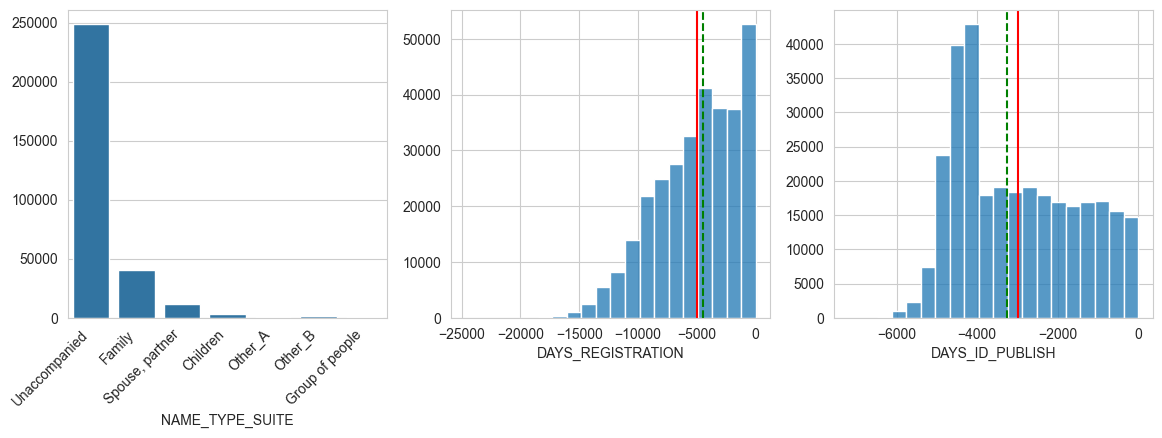

In [11]:
multi_dtype_plot(app_train_df_withbool, transaction_misc_cols[:3], 1, 3, size='wide', xtick_rotation=45, align='right', hspace=0.4)

In [26]:
percent_summary(app_train_df_withbool, 'NAME_TYPE_SUITE', items=2)

NAME_TYPE_SUITE
Unaccompanied: 81.16%
Family: 13.11%



### Insights
- Four out of five applicants attend the application process alone, and about 1/8 of the people bring along a family member.
- The distribution of (negative) days since registration is negatively-skewed. Based on the description of the column, this means that a lot more change their registration closer to the date of the application.

C:\Users\Marco\AppData\Local\Temp\ipykernel_23724\1664897184.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['SUN', 'MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT'])


<Axes: xlabel='HOUR_APPR_PROCESS_START', ylabel='count'>

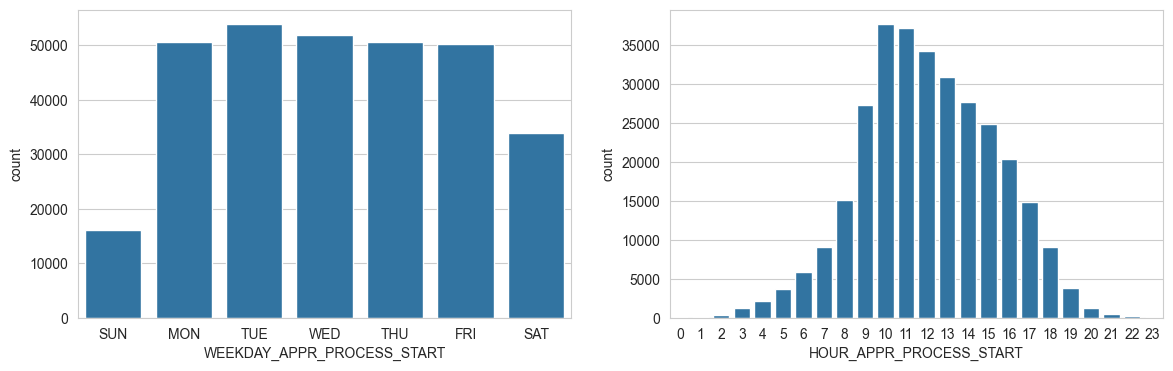

In [30]:
fig, axes = plt.subplots(1, 2, figsize = (14, 4))
axes = axes.flat
week = ['SUNDAY', 'MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY']
sns.countplot(data=app_train_df_withbool, x='WEEKDAY_APPR_PROCESS_START', order=week, ax=axes[0])
axes[0].set_xticklabels(['SUN', 'MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT'])

sns.countplot(data=app_train_df_withbool, x='HOUR_APPR_PROCESS_START', ax=axes[1])

# Bivariate Analysis

<Axes: xlabel='cust_value'>

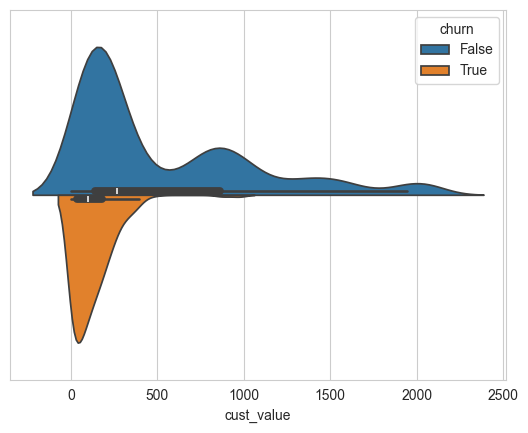

In [ ]:
sns.violinplot(data=df, x='cust_value', hue='churn', split = True)

**Observation**
- The distributions are most different beyond customer value 500. Churning customers tend to have a value less than 500, while for non-churning customers, there is more variability for their customer values.

**Implication** 
- Customer value is considered as an important feature.

# Multivariate Analysis

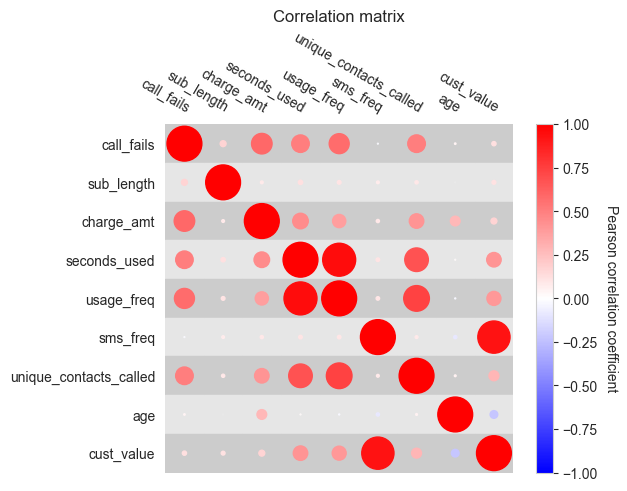

In [ ]:
num_list = list(['call_fails', 'sub_length', 'charge_amt', 'seconds_used', 'usage_freq', 'sms_freq', 'unique_contacts_called', 'age', 'cust_value'])
correl_data = df[num_list]
correl_matrix = correl_data.corr()

from psynlig import plot_correlation_heatmap

kwargs = {
    'heatmap': {
        'vmin': -1,
        'vmax': 1,
        'cmap': 'bwr',
    }
}

plot_correlation_heatmap(correl_data, bubble=True, annotate=False, **kwargs)

plt.title('Correlation matrix')
plt.show()

**Observations**
- From a common sense standpoint, it makes sense that usage (call) frequency is highly correlated with total length of calls. More calls leads to longer total call length. 
- I assume that the customer activity is one of the components when computing the customer value, but it happens that SMS frequency has the highest correlation with customer value.

**Action**
- We have multicollinearity, so we'll use the variance inflation factor.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# sub_length is removed
X = df[['call_fails', 'charge_amt', 'seconds_used', 'usage_freq', 'sms_freq', 'unique_contacts_called', 'age', 'cust_value']]
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                  Feature        VIF
0              call_fails   4.749882
1              charge_amt   2.964811
2            seconds_used  33.818931
3              usage_freq  37.993574
4                sms_freq  37.562895
5  unique_contacts_called   6.773448
6                     age   3.274927
7              cust_value  56.329023


For trial purposes, I will remove usage_freq and cust_value for the following reasons: 
- seconds_used is more skewed than usage_freq; and 
- sms_freq is the independent variable in contrast to the cust_value.

In [ ]:
# usage_freq, cust_value is removed
X = df[['call_fails', 'charge_amt', 'seconds_used', 'sms_freq', 'unique_contacts_called', 'age']]
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                  Feature       VIF
0              call_fails  3.679296
1              charge_amt  2.220766
2            seconds_used  4.315929
3                sms_freq  1.394353
4  unique_contacts_called  5.568227
5                     age  2.904331


A VIF of 0-5 indicates low correlation, and 5-10 is still an acceptable value. I think we have found our features!

# Recap
- The following numerical variables are considered as good predictors for churn: complained, charge_amt, seconds_used, usage_freq, sms_freq, unique_contacts_called, cust_value.
- For the categorical variables, potential predictors are: complained, tariff_plan, status, age bracket (as ordinal categorical).
- Reconsider dropping features vs. combining using PCA or using feature selection methods.